Number of frames: 17
Number of atoms: 408
Time step: 1000.0 ps


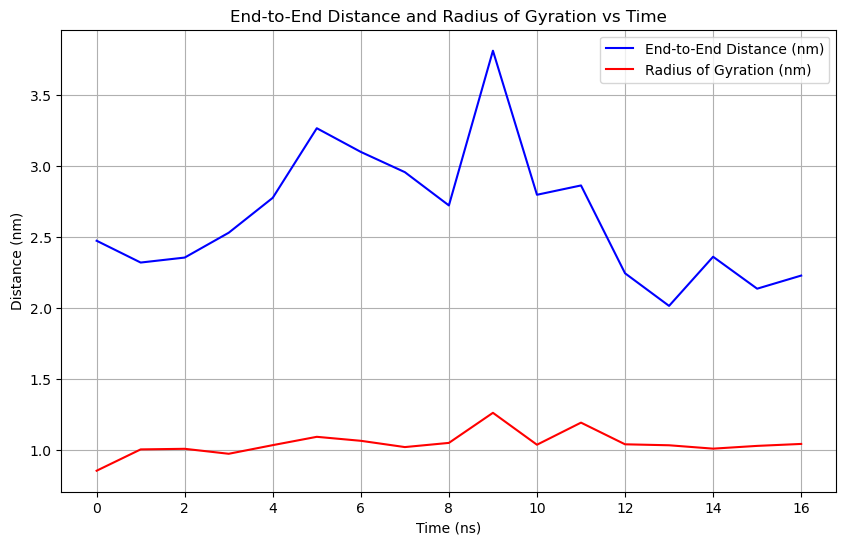

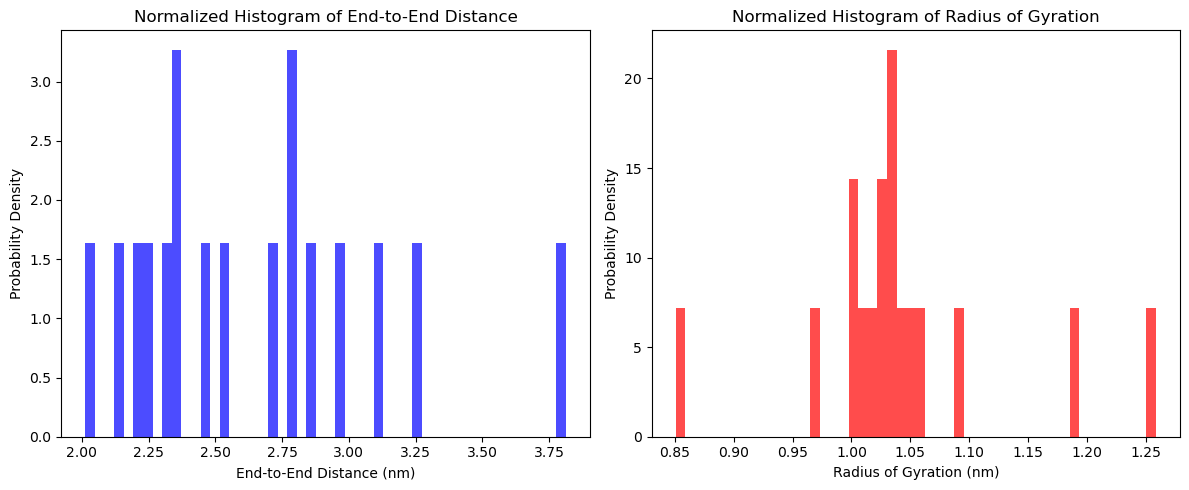

In [6]:
# Import necessary libraries
# Import necessary libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Part (a): Read in the MD trajectory of beta-amyloid
trajectory_file = 'Data/1hz3_T310.stepid25000000.every100ps.nowater.xtc'  # Replace with the correct .xtc trajectory file path
topology_file = 'Data/1hz3_T310.start.nowater.gro'    # Replace with the correct topology file path (e.g., .pdb or .gro)

# Load the trajectory using the topology file
traj = md.load(trajectory_file, top=topology_file)

# Print some information about the trajectory
print(f'Number of frames: {traj.n_frames}')
print(f'Number of atoms: {traj.n_atoms}')
print(f'Time step: {traj.timestep} ps')

# Part (b): Compute the end-to-end distance and radius of gyration at each time step
# End-to-end distance is calculated between the first and last atom in the chain
atom_indices = traj.topology.select("backbone")  # Select backbone atoms

# Compute end-to-end distance: distance between first and last backbone atom
end_to_end_distances = md.compute_distances(traj, [[atom_indices[0], atom_indices[-1]]])

# Compute radius of gyration for each frame
radius_of_gyration = md.compute_rg(traj)

# Part (c): Plot the end-to-end distance and radius of gyration vs time on the same plot
time_ns = traj.time / 1000  # Convert time to nanoseconds if the time is in picoseconds

plt.figure(figsize=(10, 6))
plt.plot(time_ns, end_to_end_distances, label='End-to-End Distance (nm)', color='b')
plt.plot(time_ns, radius_of_gyration, label='Radius of Gyration (nm)', color='r')
plt.xlabel('Time (ns)')
plt.ylabel('Distance (nm)')
plt.title('End-to-End Distance and Radius of Gyration vs Time')
plt.legend()
plt.grid(True)
plt.show()

# Part (d): Plot normalized histograms of the end-to-end distance and radius of gyration

# End-to-end distance histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(end_to_end_distances, bins=50, density=True, color='b', alpha=0.7)
plt.xlabel('End-to-End Distance (nm)')
plt.ylabel('Probability Density')
plt.title('Normalized Histogram of End-to-End Distance')

# Radius of gyration histogram
plt.subplot(1, 2, 2)
plt.hist(radius_of_gyration, bins=50, density=True, color='r', alpha=0.7)
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Probability Density')
plt.title('Normalized Histogram of Radius of Gyration')

plt.tight_layout()
plt.show()

